In [1]:
import pandas as pd
import numpy as np

In [3]:
apps_with_duplicates = pd.read_csv(r"C:\dataset\apps.csv")
apps = apps_with_duplicates.drop_duplicates()
print('Total number of apps in the dataset = ',apps['App'].value_counts().sum())
print(apps.head(5))

Total number of apps in the dataset =  9659
   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1 

In [5]:
chars_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for col in cols_to_clean:
    for char in chars_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(char,''))
print(apps.head())                       

   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size  Installs  Type Price Content Rating  \
0  ART_AND_DESIGN     4.1      159  19.0     10000  Free     0       Everyone   
1  ART_AND_DESIGN     3.9      967  14.0    500000  Free     0       Everyone   
2  ART_AND_DESIGN     4.7    87510   8.7   5000000  Free     0       Everyone   
3  ART_AND_DESIGN     4.5   215644  25.0  50000000  Free     0           Teen   
4  ART_AND_DESIGN     4.3      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   Jan

In [6]:
apps['Installs'] = apps['Installs'].astype('float')
apps['Price'] = apps['Price'].astype('float')
print(apps.dtypes)
apps

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,1000.0,Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,1000.0,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


Number of categories =  33


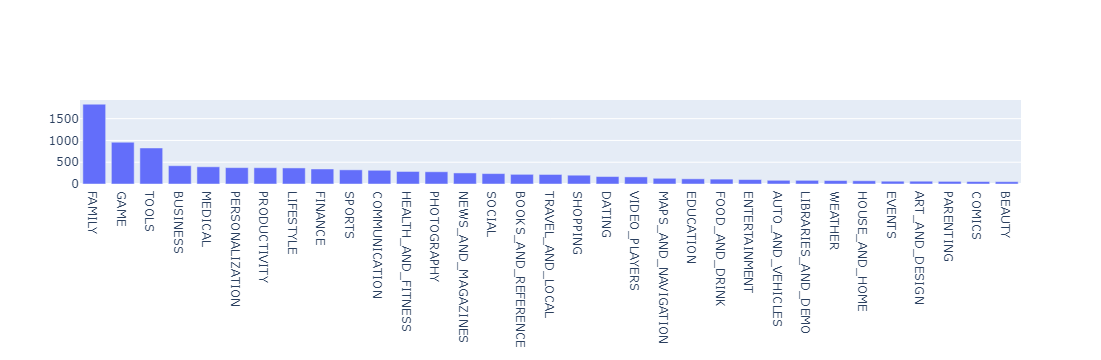

In [7]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)
 
num_apps_in_category = apps['Category'].value_counts()

sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

Average app rating =  4.173243045387994


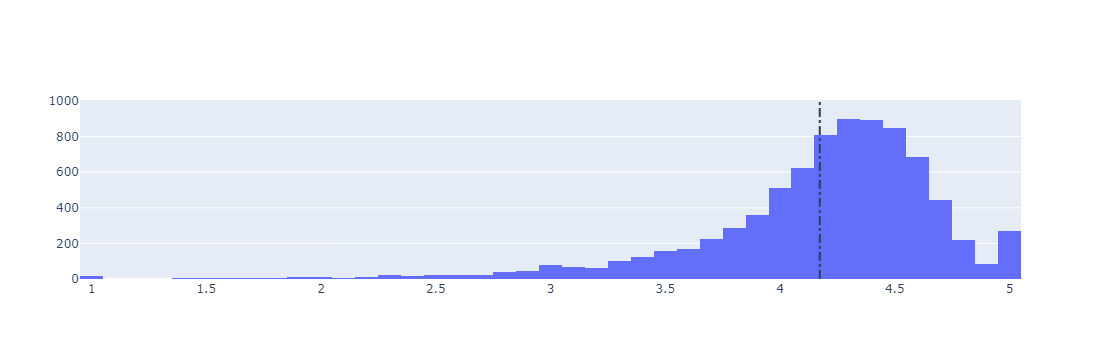

In [8]:
avg_app_rating =apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

data = [go.Histogram(
        x = apps['Rating']
)]

layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

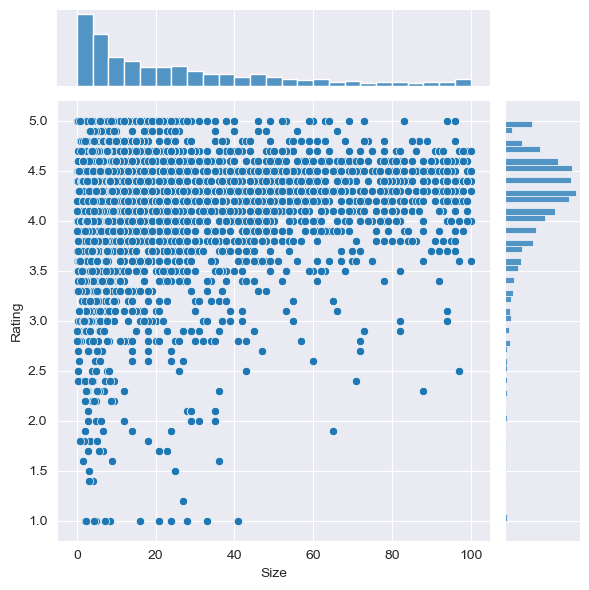

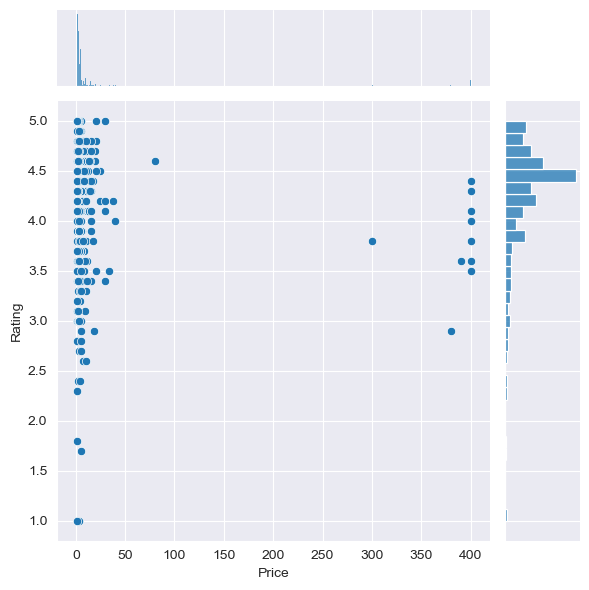

In [12]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

apps_with_size_and_rating_present = apps[(apps['Rating'].isna()==False)&(apps['Size'].isna()==False)]

large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type']=='Paid']

plt2 = sns.jointplot(x = paid_apps["Price"], y = paid_apps['Rating'])

,Category,App,Price
3327,FAMILY,most expensive app (H),399.99
3465,LIFESTYLE,💎 I'm rich,399.99
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00
4396,LIFESTYLE,I am rich,399.99
4398,FAMILY,I am Rich Plus,399.99
4399,LIFESTYLE,I am rich VIP,299.99
4400,FINANCE,I Am Rich Premium,399.99
4401,LIFESTYLE,I am extremely Rich,379.99
4402,FINANCE,I am Rich!,399.99
4403,FINANCE,I am rich(premium),399.99


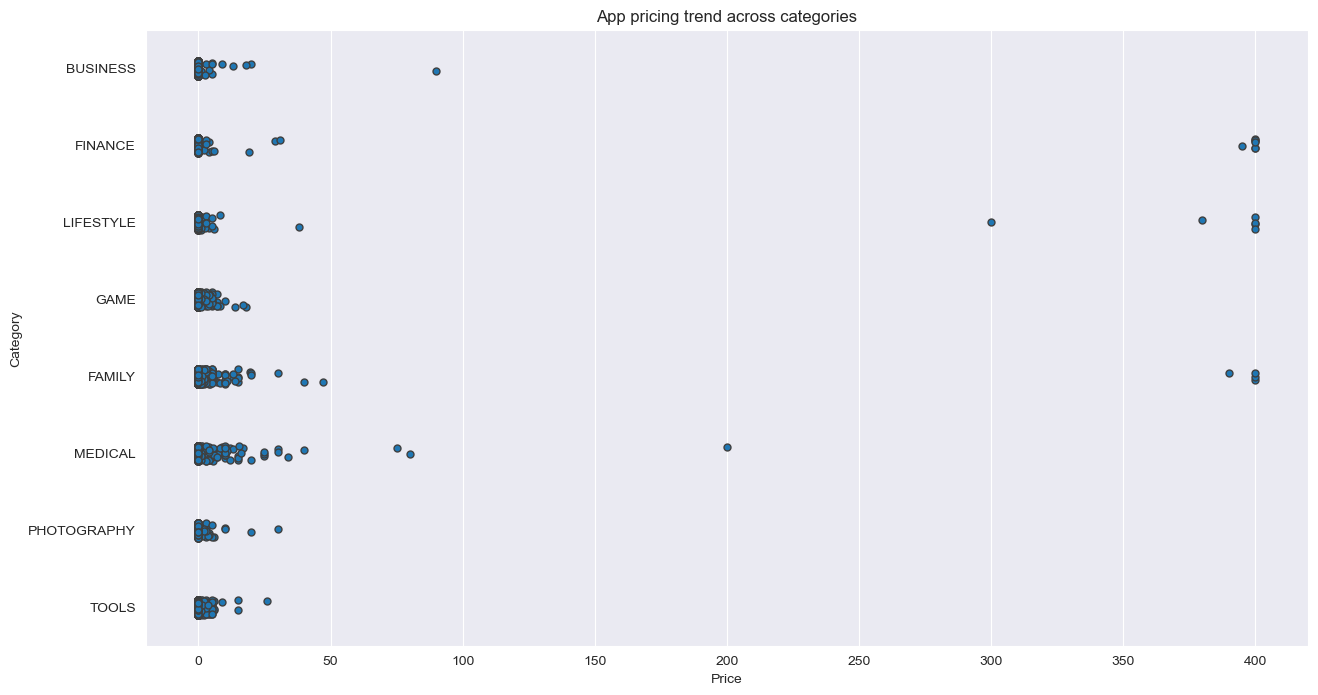

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

apps_above_200 = popular_app_cats[popular_app_cats['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

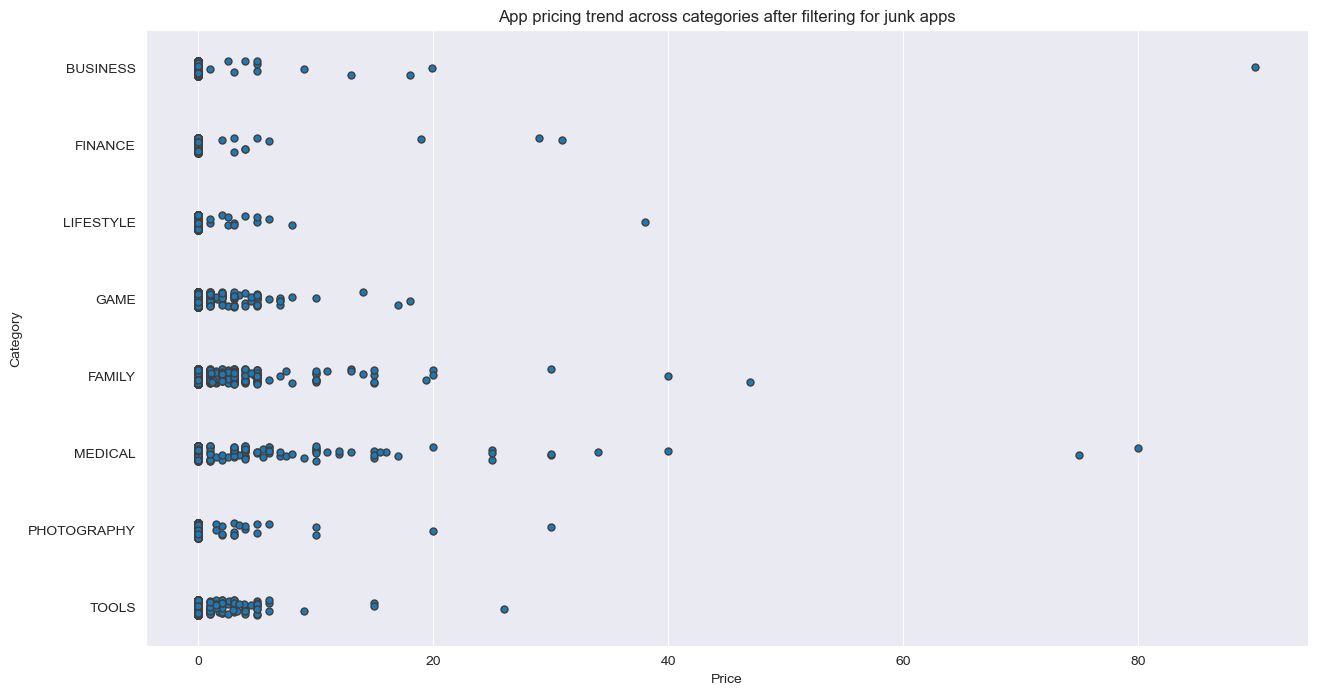

In [14]:
apps_under_100 = popular_app_cats[popular_app_cats['Price'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

ax = sns.stripplot(x = 'Price', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

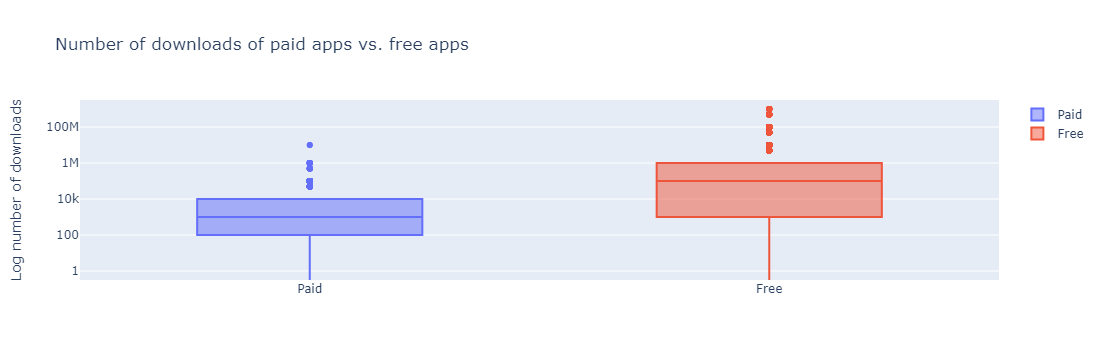

In [15]:
trace0 = go.Box(
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

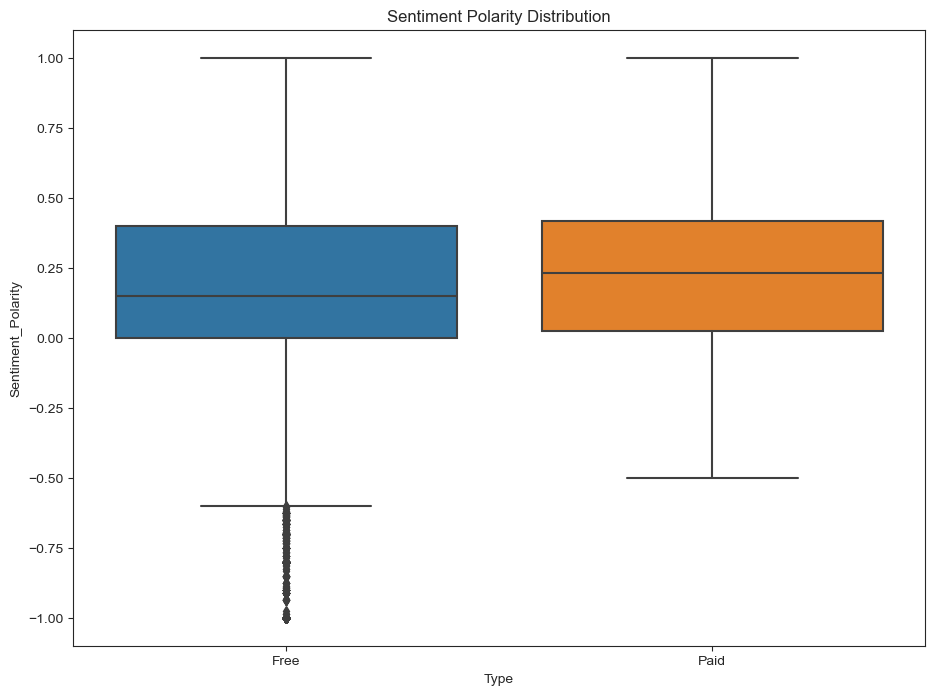

In [17]:
reviews_df = pd.read_csv(r"C:\dataset\user_reviews.csv")

merged_df = apps.merge(reviews_df,on="App")

merged_df = merged_df.dropna(subset = ['Sentiment', 'Reviews'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

ax = sns.boxplot(x = 'Type', y ='Sentiment_Polarity' , data = merged_df)
ax.set_title('Sentiment Polarity Distribution')